In [111]:
import pandas as pd
import warnings
import plotly.express as px
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [112]:
import plotly.io as pio

pio.renderers.default = "svg"

In [113]:
df = pd.read_parquet(r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/compressed_aviation_traffic_data.parquet")
df

airline_iata acft_icao acft_class seymour_proxy     source      seats  \
0               1SQ      PA32         PP          P28B        BTS    62112.0   
1               1SQ      PA32         PP          P28B        BTS    62112.0   
2                HA      B712         NB          B712        BTS  1246720.0   
3                HA      B712         NB          B712        BTS  1246720.0   
4                HA      B712         NB          B712        BTS   879296.0   
...             ...       ...        ...           ...        ...        ...   
293833          TTL      None       None          None       ANAC        0.0   
293834         None      None       None          None  AUS Stats        0.0   
293835         None      None       None          None  AUS Stats        0.0   
293836         None      None       None          None  AUS Stats        0.0   
293837         None      None       None          None  AUS Stats        0.0   

        n_flights iata_departure iata_arrival  departure_lon  ...  \
0         11466.5            SPN          TIQ     145.729004  ...   
1         11466.5            TIQ          SPN     145.619003  ...   
2          9740.0            HNL          OGG    -157.924228  ...   
3          9740.0            OGG          HNL    -156.431212  ...   
4          6869.5            HNL          KOA    -157.924228  ...   
...           ...            ...          ...            ...  ...   
293833        NaN            VIX          VIX     -40.285000  ...   
293834        NaN            MEL          ASP     144.843002  ...   
293835        NaN            SYD          ASP     151.177002  ...   
293836        NaN            MOV          BNE     148.076996  ...   
293837        NaN            TSV          MEL     146.766512  ...   

        arrival_country arrival_continent seats_no_est_scaling  distance_km  \
0                    MP                OC              62112.0    17.765225   
1                    MP                OC              62112.0    17.765225   
2                    US                OC            1246720.0   162.001417   
3                    US                OC            1246720.0   162.001417   
4                    US                OC             879296.0   262.778946   
...                 ...               ...                  ...          ...   
293833               BR                SA                  0.0     0.000000   
293834               AU                OC                  0.0  1857.153168   
293835               AU                OC                  0.0  2020.723001   
293836               AU                OC                  0.0   779.613350   
293837               AU                OC                  0.0  2050.105743   

                 ask           rpk fuel_burn_seymour     fuel_burn  \
0       1.103434e+06  9.092294e+05         20.486379  2.349071e+05   
1       1.103434e+06  9.092294e+05         20.486379  2.349071e+05   
2       2.019704e+08  1.664236e+08       1305.895783  1.271942e+07   
3       2.019704e+08  1.664236e+08       1305.895783  1.271942e+07   
4       2.310605e+08  1.903938e+08       1567.819046  1.077013e+07   
...              ...           ...               ...           ...   
293833  0.000000e+00  0.000000e+00               NaN  0.000000e+00   
293834  0.000000e+00  0.000000e+00               NaN  0.000000e+00   
293835  0.000000e+00  0.000000e+00               NaN  0.000000e+00   
293836  0.000000e+00  0.000000e+00               NaN  0.000000e+00   
293837  0.000000e+00  0.000000e+00               NaN  0.000000e+00   

                 co2  domestic  
0       7.423063e+05         1  
1       7.423063e+05         1  
2       4.019338e+07         1  
3       4.019338e+07         1  
4       3.403362e+07         1  
...              ...       ...  
293833  0.000000e+00         1  
293834  0.000000e+00         1  
293835  0.000000e+00         1  
293836  0.000000e+00         1  
293837  0.000000e+00         1  

[293838 rows x 25 columns]

In [114]:
df["log_co2"] = np.log1p(df["co2"])
df["log_distance"] = np.log1p(df["distance_km"])

In [115]:
df.departure_continent.value_counts()

departure_continent
NA    127711
EU    105514
AS     37893
AF     10754
SA      7828
OC      4121
Name: count, dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293838 entries, 0 to 293837
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   airline_iata          260430 non-null  object 
 1   acft_icao             254406 non-null  object 
 2   acft_class            254406 non-null  object 
 3   seymour_proxy         254406 non-null  object 
 4   source                293838 non-null  object 
 5   seats                 293838 non-null  float64
 6   n_flights             254406 non-null  float64
 7   iata_departure        293838 non-null  object 
 8   iata_arrival          293838 non-null  object 
 9   departure_lon         293821 non-null  float64
 10  departure_lat         293821 non-null  float64
 11  departure_country     293821 non-null  object 
 12  departure_continent   293821 non-null  object 
 13  arrival_lon           293821 non-null  float64
 14  arrival_lat           293821 non-null  float64
 15  

In [117]:
df.describe()

seats      n_flights  departure_lon  departure_lat  \
count  2.938380e+05  254406.000000  293821.000000  293821.000000   
mean   1.895692e+04      78.149379     -27.669242      38.209010   
std    8.035173e+04     221.878715      71.696743      16.750377   
min    0.000000e+00       0.000000    -179.876999     -54.843300   
25%    1.115000e+02       1.000000     -85.736000      33.435302   
50%    9.146149e+02       4.000000      -6.215830      40.519699   
75%    1.095704e+04      49.500000      16.885799      48.310501   
max    6.413983e+06   11466.500000     179.951004      78.246101   

         arrival_lon    arrival_lat  seats_no_est_scaling    distance_km  \
count  293821.000000  293821.000000          2.938380e+05  293838.000000   
mean      -27.669242      38.209010          1.565252e+04    1744.677041   
std        71.696743      16.750377          5.624081e+04    1918.492401   
min      -179.876999     -54.843300          0.000000e+00       0.000000   
25%       -85.736000      33.435302          1.115000e+02     542.555356   
50%        -6.215830      40.519699          9.389023e+02    1198.237058   
75%        16.885799      48.310501          1.046014e+04    2164.697071   
max       179.951004      78.246101          5.387742e+06   18354.870390   

                ask           rpk  fuel_burn_seymour     fuel_burn  \
count  2.938380e+05  2.938380e+05      251444.000000  2.938380e+05   
mean   3.629353e+07  2.990587e+07        8088.784900  9.156215e+05   
std    1.614029e+08  1.329960e+08       14252.956435  4.114792e+06   
min    0.000000e+00  0.000000e+00       -1682.727352 -1.682727e+03   
25%    8.999074e+04  7.415237e+04        2041.200737  3.493897e+03   
50%    1.202445e+06  9.908144e+05        4223.750606  3.440348e+04   
75%    1.471400e+07  1.212433e+07        7798.849295  3.873126e+05   
max    5.939753e+09  4.894357e+09      286618.662600  1.505975e+08   

                co2       domestic        log_co2   log_distance  
count  2.938380e+05  293838.000000  293832.000000  293838.000000  
mean   2.893364e+06       0.521015      11.460884       6.871419  
std    1.300274e+07       0.499559       3.394771       1.379313  
min   -5.317418e+03       0.000000       0.000000       0.000000  
25%    1.104072e+04       0.000000       9.309483       6.298132  
50%    1.087150e+05       1.000000      11.596596       7.089441  
75%    1.223908e+06       1.000000      14.017584       7.680498  
max    4.758880e+08       1.000000      19.980693       9.817705

In [118]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

Missing values

In [119]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_summary / len(df) * 100).round(2)
missing_df = pd.DataFrame(
    {"Missing Values": missing_summary, "Percent Missing": missing_percentage}
)
missing_df

Missing Values  Percent Missing
fuel_burn_seymour              42394            14.43
acft_class                     39432            13.42
seymour_proxy                  39432            13.42
n_flights                      39432            13.42
acft_icao                      39432            13.42
airline_iata                   33408            11.37
departure_country                 17             0.01
arrival_continent                 17             0.01
arrival_country                   17             0.01
arrival_lat                       17             0.01
departure_continent               17             0.01
arrival_lon                       17             0.01
departure_lat                     17             0.01
departure_lon                     17             0.01
log_co2                            6             0.00
iata_arrival                       0             0.00
iata_departure                     0             0.00
seats                              0             0.00
seats_no_est_scaling               0             0.00
distance_km                        0             0.00
ask                                0             0.00
rpk                                0             0.00
source                             0             0.00
fuel_burn                          0             0.00
co2                                0             0.00
domestic                           0             0.00
log_distance                       0             0.00

In [120]:
missing_df

Missing Values  Percent Missing
fuel_burn_seymour              42394            14.43
acft_class                     39432            13.42
seymour_proxy                  39432            13.42
n_flights                      39432            13.42
acft_icao                      39432            13.42
airline_iata                   33408            11.37
departure_country                 17             0.01
arrival_continent                 17             0.01
arrival_country                   17             0.01
arrival_lat                       17             0.01
departure_continent               17             0.01
arrival_lon                       17             0.01
departure_lat                     17             0.01
departure_lon                     17             0.01
log_co2                            6             0.00
iata_arrival                       0             0.00
iata_departure                     0             0.00
seats                              0             0.00
seats_no_est_scaling               0             0.00
distance_km                        0             0.00
ask                                0             0.00
rpk                                0             0.00
source                             0             0.00
fuel_burn                          0             0.00
co2                                0             0.00
domestic                           0             0.00
log_distance                       0             0.00

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Plot distribution of CO2 emissions

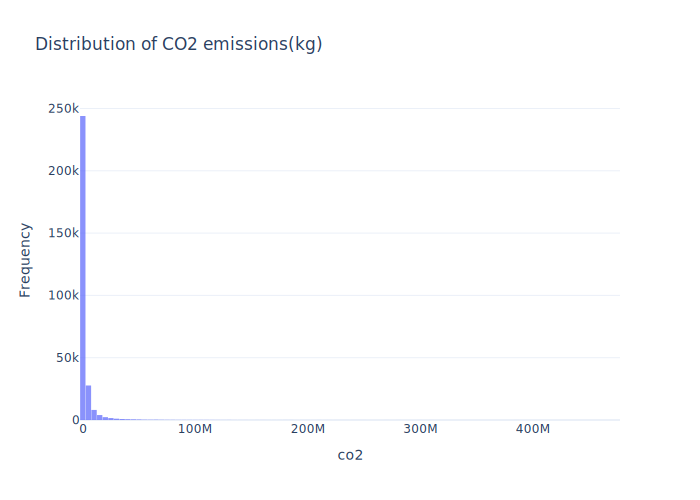

In [122]:
fig = px.histogram(
    df,
    x="co2",
    nbins=100,
    title="Distribution of CO2 emissions(kg)",
    # labels={"log_distance": "Distance (km)"},
    opacity=0.75,
)

fig.update_layout(template="plotly_white", yaxis_title="Frequency", bargap=0.05)

fig.show()

### Let's log transform the CO2 emissions and see the plot again

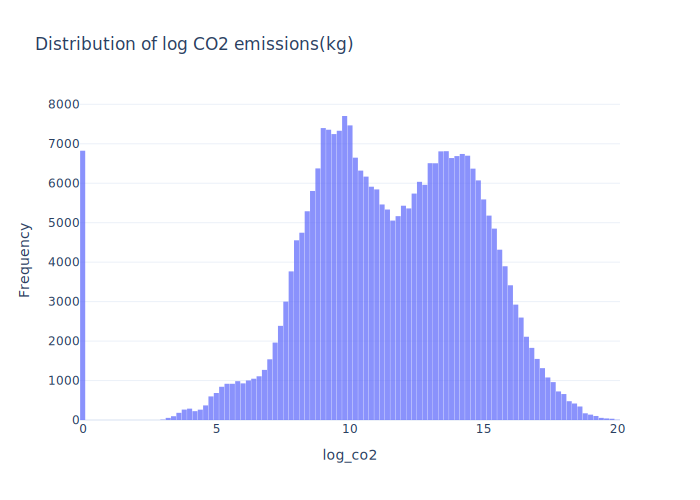

In [123]:
fig = px.histogram(
    df,
    x="log_co2",
    nbins=100,
    title="Distribution of log CO2 emissions(kg)",
    # labels={"log_distance": "Distance (km)"},
    opacity=0.75,
)

fig.update_layout(template="plotly_white", yaxis_title="Frequency", bargap=0.05)

fig.show()

### Plot distribution of distance

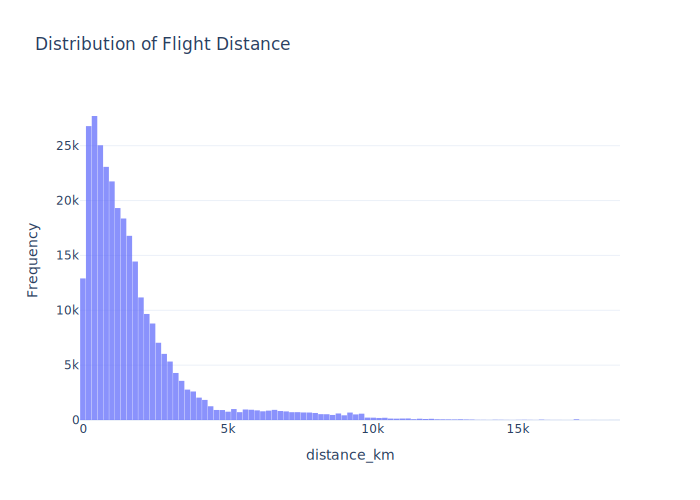

In [124]:
fig = px.histogram(
    df,
    x="distance_km",
    nbins=100,
    title="Distribution of Flight Distance",
    # labels={"log_distance": "Distance (km)"},
    opacity=0.75,
)

fig.update_layout(template="plotly_white", yaxis_title="Frequency", bargap=0.05)

fig.show()

Here we can see the distribution of distance is not normal. and concentrated on 0s. Should figure that out. We can try to log transform the distance and see if it helps.

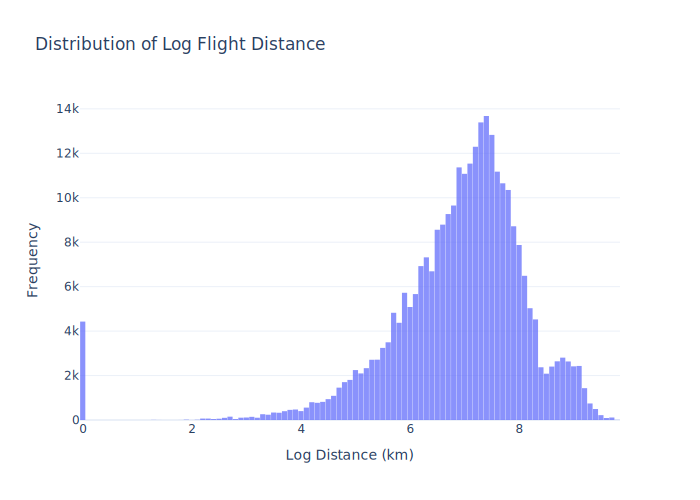

In [125]:
fig = px.histogram(
    df,
    x="log_distance",
    nbins=100,
    title="Distribution of Log Flight Distance",
    labels={"log_distance": "Log Distance (km)"},
    opacity=0.75,
)

fig.update_layout(template="plotly_white", yaxis_title="Frequency", bargap=0.05)

fig.show()

In [126]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [127]:
df

airline_iata acft_icao acft_class seymour_proxy     source      seats  \
0               1SQ      PA32         PP          P28B        BTS    62112.0   
1               1SQ      PA32         PP          P28B        BTS    62112.0   
2                HA      B712         NB          B712        BTS  1246720.0   
3                HA      B712         NB          B712        BTS  1246720.0   
4                HA      B712         NB          B712        BTS   879296.0   
...             ...       ...        ...           ...        ...        ...   
293833          TTL      None       None          None       ANAC        0.0   
293834         None      None       None          None  AUS Stats        0.0   
293835         None      None       None          None  AUS Stats        0.0   
293836         None      None       None          None  AUS Stats        0.0   
293837         None      None       None          None  AUS Stats        0.0   

        n_flights iata_departure iata_arrival  departure_lon  ...  \
0         11466.5            SPN          TIQ     145.729004  ...   
1         11466.5            TIQ          SPN     145.619003  ...   
2          9740.0            HNL          OGG    -157.924228  ...   
3          9740.0            OGG          HNL    -156.431212  ...   
4          6869.5            HNL          KOA    -157.924228  ...   
...           ...            ...          ...            ...  ...   
293833        NaN            VIX          VIX     -40.285000  ...   
293834        NaN            MEL          ASP     144.843002  ...   
293835        NaN            SYD          ASP     151.177002  ...   
293836        NaN            MOV          BNE     148.076996  ...   
293837        NaN            TSV          MEL     146.766512  ...   

        seats_no_est_scaling  distance_km           ask           rpk  \
0                    62112.0    17.765225  1.103434e+06  9.092294e+05   
1                    62112.0    17.765225  1.103434e+06  9.092294e+05   
2                  1246720.0   162.001417  2.019704e+08  1.664236e+08   
3                  1246720.0   162.001417  2.019704e+08  1.664236e+08   
4                   879296.0   262.778946  2.310605e+08  1.903938e+08   
...                      ...          ...           ...           ...   
293833                   0.0     0.000000  0.000000e+00  0.000000e+00   
293834                   0.0  1857.153168  0.000000e+00  0.000000e+00   
293835                   0.0  2020.723001  0.000000e+00  0.000000e+00   
293836                   0.0   779.613350  0.000000e+00  0.000000e+00   
293837                   0.0  2050.105743  0.000000e+00  0.000000e+00   

        fuel_burn_seymour     fuel_burn           co2  domestic    log_co2  \
0               20.486379  2.349071e+05  7.423063e+05         1  13.517519   
1               20.486379  2.349071e+05  7.423063e+05         1  13.517519   
2             1305.895783  1.271942e+07  4.019338e+07         1  17.509213   
3             1305.895783  1.271942e+07  4.019338e+07         1  17.509213   
4             1567.819046  1.077013e+07  3.403362e+07         1  17.342859   
...                   ...           ...           ...       ...        ...   
293833                NaN  0.000000e+00  0.000000e+00         1   0.000000   
293834                NaN  0.000000e+00  0.000000e+00         1   0.000000   
293835                NaN  0.000000e+00  0.000000e+00         1   0.000000   
293836                NaN  0.000000e+00  0.000000e+00         1   0.000000   
293837                NaN  0.000000e+00  0.000000e+00         1   0.000000   

        log_distance  
0           2.932005  
1           2.932005  
2           5.093759  
3           5.093759  
4           5.575111  
...              ...  
293833      0.000000  
293834      7.527338  
293835      7.611705  
293836      6.660080  
293837      7.626134  

[293838 rows x 27 columns]

In [128]:
df.columns

Index(['airline_iata', 'acft_icao', 'acft_class', 'seymour_proxy', 'source',
       'seats', 'n_flights', 'iata_departure', 'iata_arrival', 'departure_lon',
       'departure_lat', 'departure_country', 'departure_continent',
       'arrival_lon', 'arrival_lat', 'arrival_country', 'arrival_continent',
       'seats_no_est_scaling', 'distance_km', 'ask', 'rpk',
       'fuel_burn_seymour', 'fuel_burn', 'co2', 'domestic', 'log_co2',
       'log_distance'],
      dtype='object')

In [129]:
def distance_cumul_plot_flights(flights_df):
    fig = go.Figure()

    # Define bins for a quick cumulative distribution rendering. 10 km
    bins = list(range(0, int(flights_df["distance_km"].max()) + 10, 10))

    # Cumulative distributions for each metric
    # Seats
    hist_seats, edges_seats = (
        flights_df["seats"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_seats = hist_seats.cumsum() / hist_seats.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_seats,
            y=hist_cumul_seats,
            mode="lines",
            name="Seats",
            line=dict(color="#1f77b4", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    # ASK
    hist_ask, edges_ask = (
        flights_df["ask"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_ask = hist_ask.cumsum() / hist_ask.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_ask,
            y=hist_cumul_ask,
            mode="lines",
            name="ASK",
            line=dict(color="#ff7f0e", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    #  CO2
    hist_co2, edges_co2 = (
        flights_df["co2"].groupby(pd.cut(flights_df["distance_km"], bins)).sum(),
        bins[1:],
    )
    hist_cumul_co2 = hist_co2.cumsum() / hist_co2.sum() * 100
    fig.add_trace(
        go.Scatter(
            x=edges_co2,
            y=hist_cumul_co2,
            mode="lines",
            name="CO2 (kg)",
            line=dict(color="#2ca02c", width=2),
            hovertemplate="%{y:.2f} %",
        )
    )

    # Formatting
    fig.update_layout(
        title="Metrics cumulative distribution vs flight distance",
        xaxis_title="Distance (km)",
        yaxis_title="Cumulative distribution (%)",
        template="plotly_white",
        hovermode="x",
        margin=dict(l=60, r=60, t=60, b=60),
        legend=dict(
            x=0.82,
            y=0.08,
            bgcolor="rgba(255, 255, 255, 0.5)",
        ),
    )

    return fig

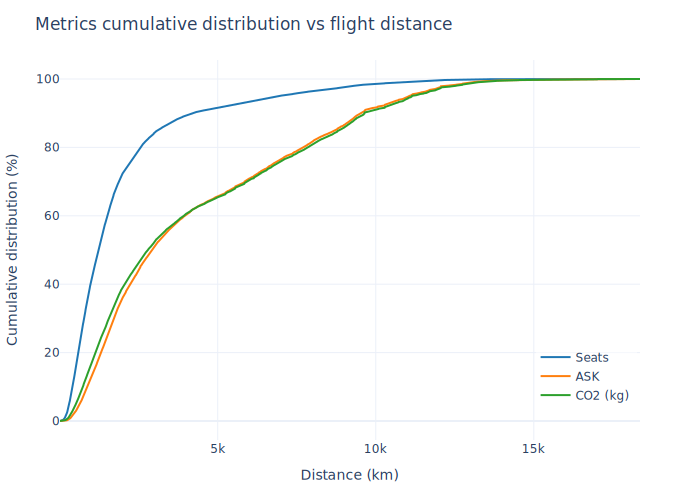

In [130]:
distance_cumul_plot_flights(df)

1. Seats
Shows that most seating capacity is deployed on flights shorter than 5000 km. (cumulative 90% of all seats). This includes short and medium routes

2. ASK (~65% under 5000 km)
Indicates that ~65% of available seat kilometers (a proxy for supply) also comes from shorter flights.
Suggests that shorter flights dominate volume, though not in direct proportion to seats (because distance matters in ASK).

3. CO2 (~65% under 5000 km)
CO2 emissions track ASK closely — again, showing that shorter flights contribute significantly to total emissions.
However, there's a divergence from seats, meaning short flights emit more per seat compared to long-haul flights.

In [131]:
def distance_histogram_plot_flights(flights_df, value_watched_flights, strategy="mean"):
    fig = go.Figure()

    # Define bins for the histogram (500 km intervals)
    bin_width = 500
    bins = list(range(0, int(flights_df["distance_km"].max()) + bin_width, bin_width))
    bin_centers = [b + bin_width / 2 for b in bins[:-1]]  # Midpoints of each bin

    bin_ranges = [f"{b - bin_width / 2}-{b + bin_width / 2}" for b in bin_centers]

    # Group by distance bins and calculate the mean or sum of the specified value
    if strategy == "mean":
        grouped = flights_df.groupby(pd.cut(flights_df["distance_km"], bins))[
            value_watched_flights
        ].mean()
    elif strategy == "sum":
        grouped = flights_df.groupby(pd.cut(flights_df["distance_km"], bins))[
            value_watched_flights
        ].sum()

    fig.add_trace(
        go.Bar(
            x=bin_centers,  # Use the center of bins for tick alignment
            y=grouped,
            name=value_watched_flights,
            width=bin_width,
            marker=dict(color="#EE9B00", opacity=0.5),
            hovertemplate=(
                "Distance %{customdata} km:<br>"
                + value_watched_flights
                + " %{y:.2e}<extra></extra>"
            ),
            customdata=bin_ranges,
        )
    )

    # Formatting
    fig.update_layout(
        title=f"Repartition of {strategy.upper()} {value_watched_flights.upper()} by flight distance",
        xaxis_title="Distance (km)",
        yaxis_title=value_watched_flights,
        template="plotly_white",
        hovermode="closest",
        bargap=0.3,
        xaxis=dict(
            tickmode="linear",
            dtick=bin_width,
            range=[0, bins[-1]],
        ),
        margin=dict(l=60, r=60, t=60, b=60),
    )

    return fig

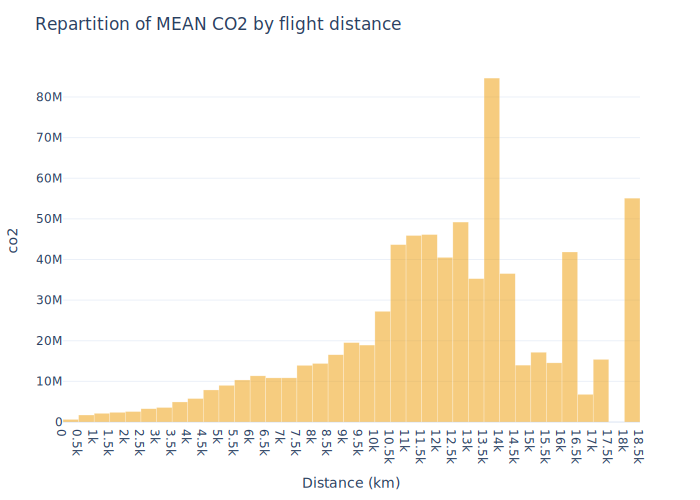

In [132]:
distance_histogram_plot_flights(df, "co2", "mean")

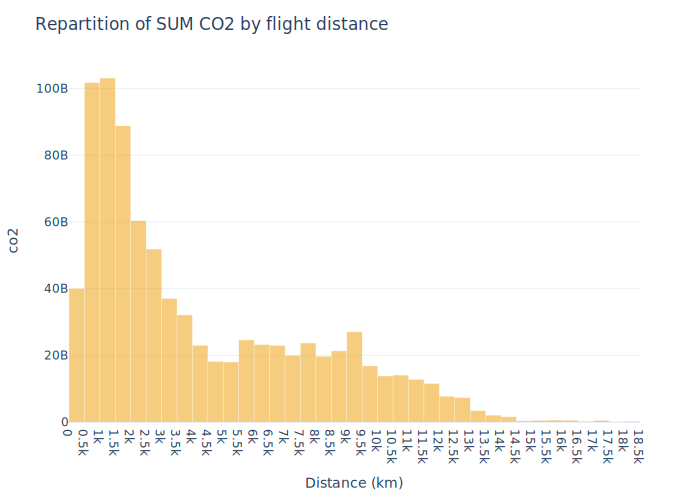

In [133]:
distance_histogram_plot_flights(df, "co2", "sum")

Above results show that Shorter flights contribute most to **total** CO2 emissions. 
- The first histogram shows that most of the total CO2 emissions come from flights in the 500–2500 km range, despite being relatively short distances. This happens because short and medium length flights occur far more frequently, leading to cumulative emissions being very high.

Long flights emit more CO2 **per flight**
- The second histogram shows the average CO₂ per flight increases with distance. For flights longer than 10000 km, individual flights emit tens of millions of kg CO2, reflecting the inefficiency of extra long routes.

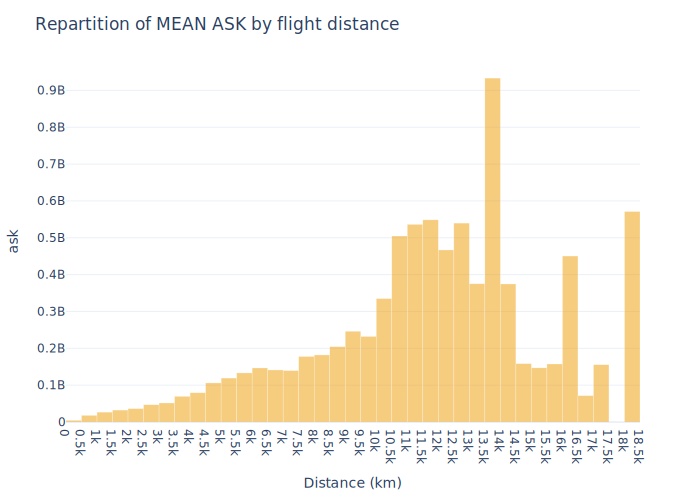

In [134]:
distance_histogram_plot_flights(df, "ask")

### Plot distance shared by type of flight (domestic | international)

In [135]:
def distance_share_dom_int_flights(flights_df, value_watched_flights, strategy="sum"):
    fig = go.Figure()

    bin_width = 500
    bins = list(range(0, int(flights_df["distance_km"].max()) + bin_width, bin_width))
    bin_centers = [b + bin_width / 2 for b in bins[:-1]]
    if strategy == "mean":
        # Group by distance bins and calculate the mean or sum of the specified value
        grouped = (
            flights_df.groupby([pd.cut(flights_df["distance_km"], bins), "domestic"])[
                value_watched_flights
            ]
            .mean()
            .unstack(fill_value=0)
        )
    elif strategy == "sum":
        grouped = (
            flights_df.groupby([pd.cut(flights_df["distance_km"], bins), "domestic"])[
                value_watched_flights
            ]
            .sum()
            .unstack(fill_value=0)
        )

    share_df = grouped.div(grouped.sum(axis=1), axis=0) * 100

    bin_ranges = [f"{b - bin_width / 2}-{b + bin_width / 2}" for b in bin_centers]

    for flight_type in share_df.columns:
        fig.add_trace(
            go.Bar(
                x=bin_centers,
                y=share_df[flight_type],
                name="Domestic" if flight_type == 1 else "International",
                width=bin_width,
                opacity=0.7,
                hovertemplate=(
                    "Distance %{customdata} km:<br>" + "%{y:.2f} %<extra></extra>"
                ),
                customdata=bin_ranges,
                marker=dict(line=dict(width=0)),
            )
        )

    fig.update_layout(
        title=f"Flight type vs flight distance<br>Weighting on: {strategy.upper()} of {value_watched_flights}",
        xaxis_title="Distance (km)",
        yaxis_title="Flight type distribution (%)",
        template="plotly_white",
        hovermode="x",
        barmode="stack",
        yaxis=dict(tickformat=".0f", range=[0, 100]),  # Ensure % scaling
        xaxis=dict(
            tickmode="linear",
            dtick=bin_width,
            range=[0, bins[-1]],
        ),
        legend_title="Flight Type",
        legend=dict(x=0.82, y=0.08, bgcolor="rgba(255, 255, 255, 0.5)"),
        colorway=px.colors.qualitative.T10,
        margin=dict(l=60, r=60, t=60, b=60),
    )

    return fig

#### Looking at the total co2 emissions by distance and type of flight.

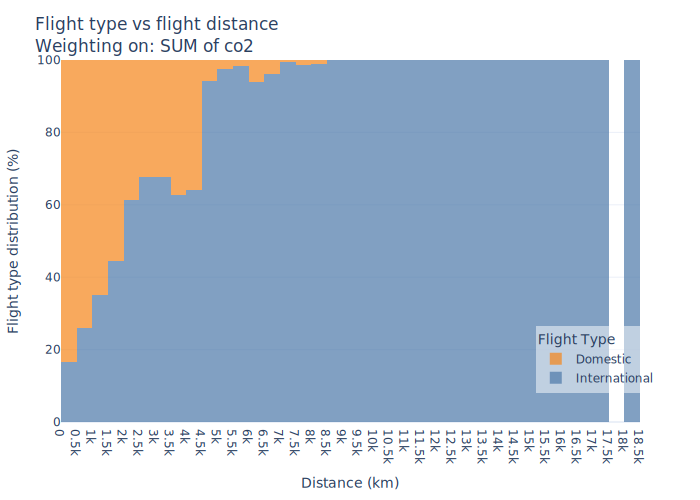

In [136]:
distance_share_dom_int_flights(df, "co2")

Even though long flights are fewer, they are almost exclusively international and they account for the majority of CO2 emissions at longer distances, making them key targets for global climate policy and airline sustainability efforts.

Let's see if the tendency in the previous plots is the same here, differs between average and sum of co2. 

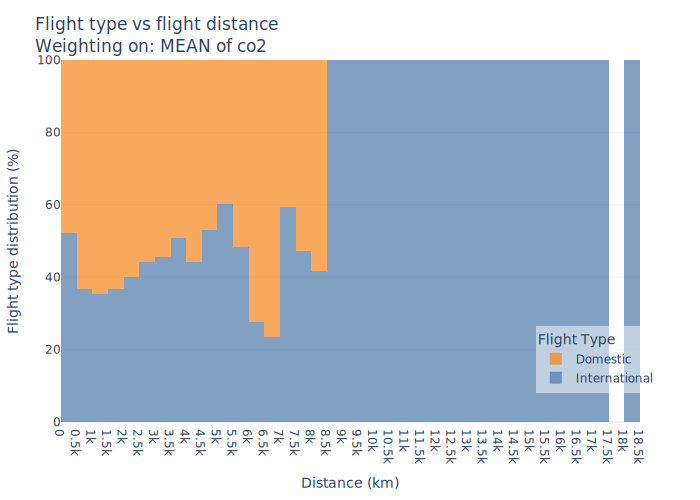

In [137]:
distance_share_dom_int_flights(df, "co2", "mean")

If we look at the average CO2 emissions, domestic flights contribute significantly to average CO2 emissions at medium distances (2000–8500 km), they *emit more per flight than international flights.*

**This challenges the assumption that domestic flights are always more efficient and suggests they may be less optimized or operate with lower occupancy at these ranges.**

### Plot CO2 vs Seats

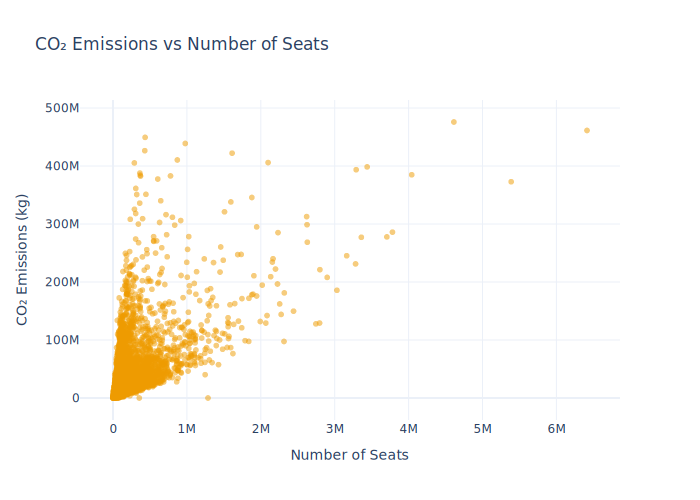

In [138]:
fig = px.scatter(
    df,
    x="seats",
    y="co2",
    opacity=0.3,
    title="CO₂ Emissions vs Number of Seats",
    labels={"seats": "Number of Seats", "co2": "CO₂ Emissions (kg)"},
)

fig.update_traces(marker=dict(color="#EE9B00"))
fig.update_layout(template="plotly_white")
fig.show()

More seats generally mean more emissions but with large variability


### Boxplot: CO2 by Aircraft Class

In [139]:
fig = px.box(
    df,
    x="acft_class",
    y="co2",
    points="outliers",  # we can use "all", "outliers", or False
    title="CO₂ Emissions by Aircraft Class",
    labels={"co2": "CO₂ Emissions (kg)", "acft_class": "Aircraft Class"},
)

fig.update_layout(
    template="plotly_white",
    xaxis_title="Aircraft Class",
    yaxis_title="CO₂ Emissions (kg)",
    margin=dict(l=60, r=60, t=60, b=60),
)

fig.update_xaxes(tickangle=45)

fig.show()

- Wide-body aircraft emit the most on average. Extreme outliers are present in this category.

- Narrow-body  and Regional Jets  follow in the same pattern but with less emissions.

- Private Jets and Piston Propeller aircraft have much lower emissions

### Correlation matrix for CO2 emissions


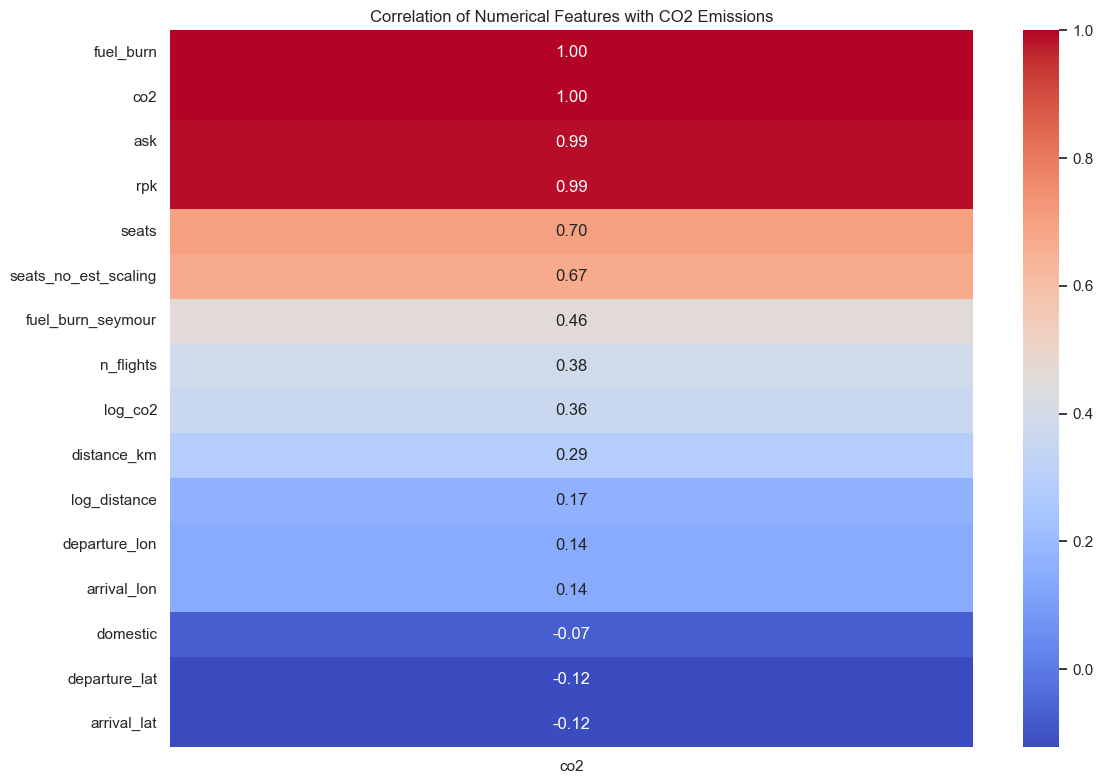

In [140]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["co2"]].sort_values(by="co2", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation of Numerical Features with CO2 Emissions")
plt.tight_layout()
plt.show()

### Correlation matrix for Log CO2 emissions

### Correlation matrix for Log CO2 emission by other variables

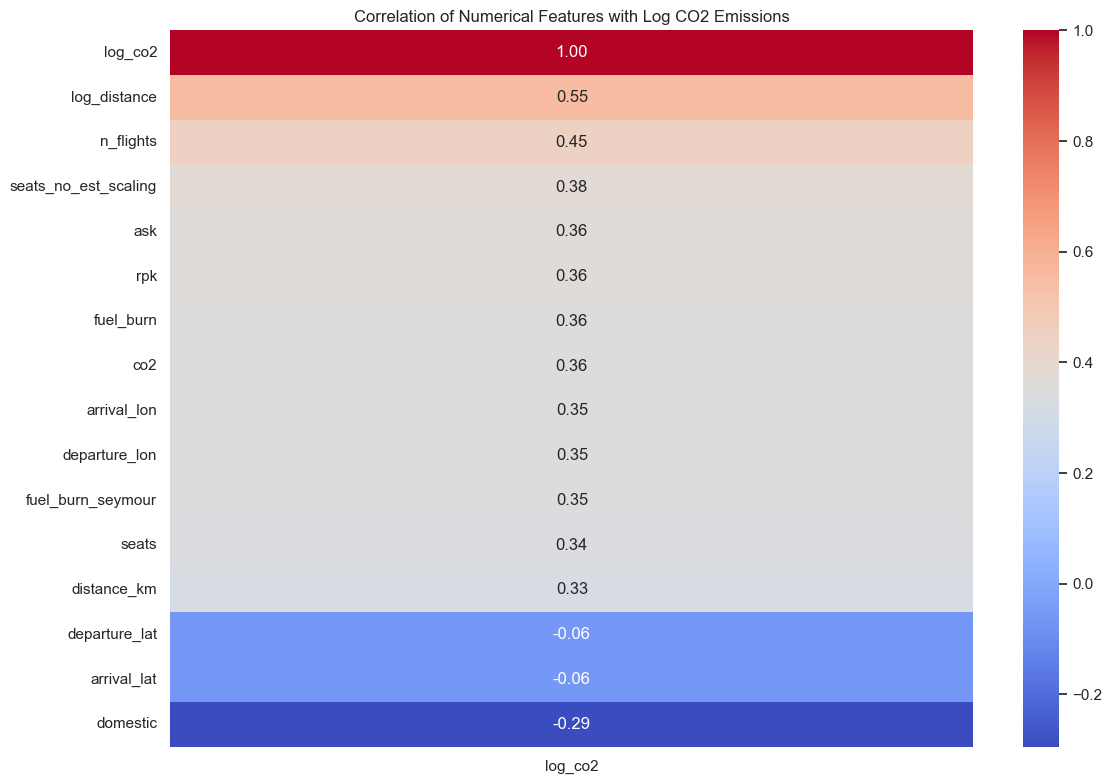

In [141]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix[["log_co2"]].sort_values(by="log_co2", ascending=False),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation of Numerical Features with Log CO2 Emissions")
plt.tight_layout()
plt.show()

correlation_matrix_sorted = correlation_matrix.sort_values(
    by="log_co2", ascending=False
)

### Correlation matrix for all variables

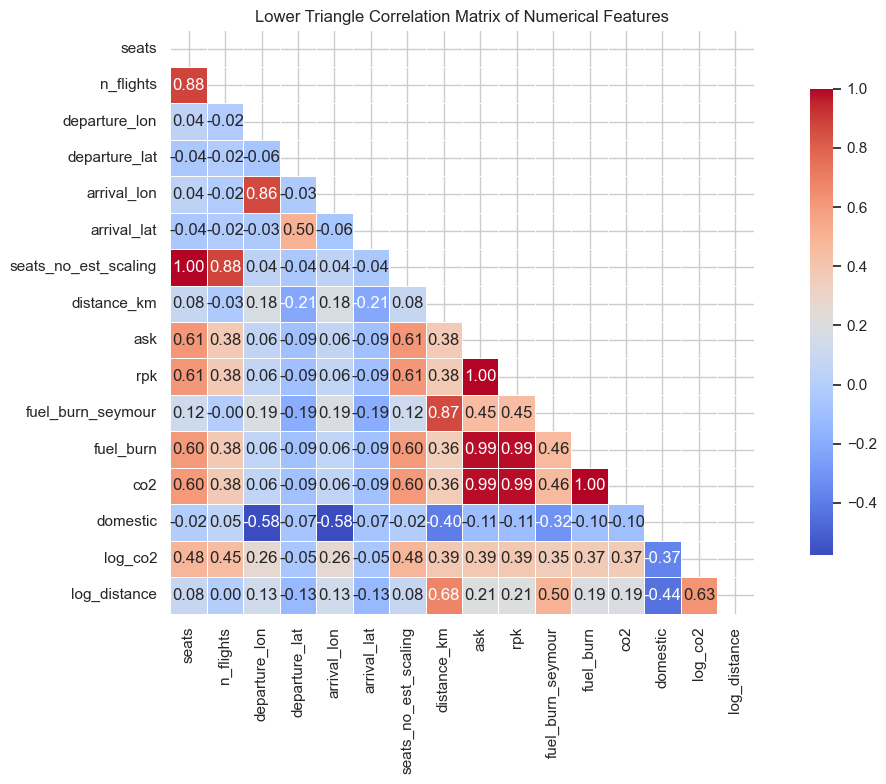

In [142]:
numeric_df = df.select_dtypes(include=["float64", "int64"]).dropna()
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Lower Triangle Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [143]:
numeric_cols = [
    "seats",
    "n_flights",
    "seats_no_est_scaling",
    "distance_km",
    "log_distance",
    "ask",
    "rpk",
    "fuel_burn_seymour",
    "fuel_burn",
    "co2",
    "log_co2",
]
numeric_data = df[numeric_cols]

missing_summary = numeric_data.isnull().sum().sort_values(ascending=False)

outlier_info = {}
for col in numeric_cols:
    if col in numeric_data.columns:
        q1 = numeric_data[col].quantile(0.25)
        q3 = numeric_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = (
            (numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)
        ).sum()
        pct_outliers = (outliers / len(numeric_data)) * 100
        outlier_info[col] = {
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "n_outliers": outliers,
            "% outliers": round(pct_outliers, 2),
        }

outliers_df = pd.DataFrame(outlier_info).T.sort_values(by="n_outliers", ascending=False)
outliers_df

lower_bound   upper_bound  n_outliers  % outliers
ask                  -2.184602e+07  3.665001e+07     44396.0       15.11
rpk                  -1.800112e+07  3.019961e+07     44396.0       15.11
fuel_burn            -5.722342e+05  9.630407e+05     43932.0       14.95
co2                  -1.808260e+06  3.043208e+06     43932.0       14.95
seats                -1.615682e+04  2.722536e+04     43378.0       14.76
seats_no_est_scaling -1.541146e+04  2.598310e+04     42168.0       14.35
n_flights            -7.175000e+01  1.222500e+02     38838.0       13.22
fuel_burn_seymour    -6.595272e+03  1.643532e+04     21512.0        7.32
distance_km          -1.890657e+03  4.597910e+03     20826.0        7.09
log_distance          4.224583e+00  9.754047e+00      9508.0        3.24
log_co2               2.247331e+00  2.107974e+01      6824.0        2.32

### Capping them with 99 percentile.


In [144]:
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

Capping values for whole data: 
- **Lower Upper Column**
- 0.0 266362.1484 *seats*
- 0.5 1047.0 *n_flights*
- 0.0 205793.0 *seats_no_est_scaling*
- 0.0 9487.429969576144 *distance_km*
- 0.0 9.157828437408874 *log_distance*
- 0.0 661030796.2811933 *ask*
- 0.0 544689376.1357032 *rpk*
- 0.0 75479.37857206319 *fuel_burn_seymour*
- 0.0 16210973.498874782 *fuel_burn*
- 0.0 51226676.25644431 *co2*
- 0.0 17.75177099448037 *log_co2*

### Fill mising with median

In [145]:
df.isnull().sum()

airline_iata            33408
acft_icao               39432
acft_class              39432
seymour_proxy           39432
source                      0
seats                       0
n_flights               39432
iata_departure              0
iata_arrival                0
departure_lon              17
departure_lat              17
departure_country          17
departure_continent        17
arrival_lon                17
arrival_lat                17
arrival_country            17
arrival_continent          17
seats_no_est_scaling        0
distance_km                 0
ask                         0
rpk                         0
fuel_burn_seymour       42394
fuel_burn                   0
co2                         0
domestic                    0
log_co2                     6
log_distance                0
dtype: int64

In [146]:
df["co2_per_distance"] = df["co2"] / df["distance_km"]
df

airline_iata acft_icao acft_class seymour_proxy     source  \
0               1SQ      PA32         PP          P28B        BTS   
1               1SQ      PA32         PP          P28B        BTS   
2                HA      B712         NB          B712        BTS   
3                HA      B712         NB          B712        BTS   
4                HA      B712         NB          B712        BTS   
...             ...       ...        ...           ...        ...   
293833          TTL      None       None          None       ANAC   
293834         None      None       None          None  AUS Stats   
293835         None      None       None          None  AUS Stats   
293836         None      None       None          None  AUS Stats   
293837         None      None       None          None  AUS Stats   

              seats  n_flights iata_departure iata_arrival  departure_lon  \
0        62112.0000     1047.0            SPN          TIQ     145.729004   
1        62112.0000     1047.0            TIQ          SPN     145.619003   
2       266362.1484     1047.0            HNL          OGG    -157.924228   
3       266362.1484     1047.0            OGG          HNL    -156.431212   
4       266362.1484     1047.0            HNL          KOA    -157.924228   
...             ...        ...            ...          ...            ...   
293833       0.0000        NaN            VIX          VIX     -40.285000   
293834       0.0000        NaN            MEL          ASP     144.843002   
293835       0.0000        NaN            SYD          ASP     151.177002   
293836       0.0000        NaN            MOV          BNE     148.076996   
293837       0.0000        NaN            TSV          MEL     146.766512   

        ...  distance_km           ask           rpk  fuel_burn_seymour  \
0       ...    17.765225  1.103434e+06  9.092294e+05          20.486379   
1       ...    17.765225  1.103434e+06  9.092294e+05          20.486379   
2       ...   162.001417  2.019704e+08  1.664236e+08        1305.895783   
3       ...   162.001417  2.019704e+08  1.664236e+08        1305.895783   
4       ...   262.778946  2.310605e+08  1.903938e+08        1567.819046   
...     ...          ...           ...           ...                ...   
293833  ...     0.000000  0.000000e+00  0.000000e+00                NaN   
293834  ...  1857.153168  0.000000e+00  0.000000e+00                NaN   
293835  ...  2020.723001  0.000000e+00  0.000000e+00                NaN   
293836  ...   779.613350  0.000000e+00  0.000000e+00                NaN   
293837  ...  2050.105743  0.000000e+00  0.000000e+00                NaN   

           fuel_burn           co2 domestic    log_co2  log_distance  \
0       2.349071e+05  7.423063e+05        1  13.517519      2.932005   
1       2.349071e+05  7.423063e+05        1  13.517519      2.932005   
2       1.271942e+07  4.019338e+07        1  17.509213      5.093759   
3       1.271942e+07  4.019338e+07        1  17.509213      5.093759   
4       1.077013e+07  3.403362e+07        1  17.342859      5.575111   
...              ...           ...      ...        ...           ...   
293833  0.000000e+00  0.000000e+00        1   0.000000      0.000000   
293834  0.000000e+00  0.000000e+00        1   0.000000      7.527338   
293835  0.000000e+00  0.000000e+00        1   0.000000      7.611705   
293836  0.000000e+00  0.000000e+00        1   0.000000      6.660080   
293837  0.000000e+00  0.000000e+00        1   0.000000      7.626134   

        co2_per_distance  
0           41784.233355  
1           41784.233355  
2          248105.130283  
3          248105.130283  
4          129514.257569  
...                  ...  
293833               NaN  
293834          0.000000  
293835          0.000000  
293836          0.000000  
293837          0.000000  

[293838 rows x 28 columns]

In [147]:
df.isnull().sum()

airline_iata            33408
acft_icao               39432
acft_class              39432
seymour_proxy           39432
source                      0
seats                       0
n_flights               39432
iata_departure              0
iata_arrival                0
departure_lon              17
departure_lat              17
departure_country          17
departure_continent        17
arrival_lon                17
arrival_lat                17
arrival_country            17
arrival_continent          17
seats_no_est_scaling        0
distance_km                 0
ask                         0
rpk                         0
fuel_burn_seymour       42394
fuel_burn                   0
co2                         0
domestic                    0
log_co2                     6
log_distance                0
co2_per_distance         4266
dtype: int64

In [148]:
df["co2_per_distance"].fillna(
    0, inplace=True
)  # becuase if co2 = 0, distance = 0, co2_per_distance computed as Nan

In [149]:
df[numeric_cols] = numeric_data.fillna(numeric_data.median())
df[numeric_cols].isnull().sum()

seats                   0
n_flights               0
seats_no_est_scaling    0
distance_km             0
log_distance            0
ask                     0
rpk                     0
fuel_burn_seymour       0
fuel_burn               0
co2                     0
log_co2                 0
dtype: int64

In [150]:
df.isnull().sum().sort_values(ascending=False)

acft_class              39432
seymour_proxy           39432
acft_icao               39432
airline_iata            33408
departure_lat              17
arrival_continent          17
arrival_country            17
arrival_lon                17
departure_continent        17
departure_country          17
arrival_lat                17
departure_lon              17
rpk                         0
log_distance                0
log_co2                     0
domestic                    0
co2                         0
fuel_burn                   0
fuel_burn_seymour           0
ask                         0
iata_arrival                0
distance_km                 0
seats_no_est_scaling        0
source                      0
seats                       0
n_flights                   0
iata_departure              0
co2_per_distance            0
dtype: int64

### Identify columns where negative or zero values should not logically exist


In [151]:
df.shape

(293838, 28)

In [152]:
positive_only_cols = [
    "distance_km",
    "co2",
    "fuel_burn",
    "ask",
    "rpk",
    "seats",
    "seats_no_est_scaling",
    "co2_per_distance",
]

invalid_counts = {
    col: {"negative_values": (df[col] < 0).sum(), "zero_values": (df[col] == 0).sum()}
    for col in positive_only_cols
}

invalid_df = pd.DataFrame(invalid_counts).T

for col in positive_only_cols:
    df = df[(df[col] > 0)]

# df["log_co2"] = np.log1p(df["co2"])
# df["log_distance"] = np.log1p(df["distance_km"])

df.shape[0]

286076

### Impute categorical variables

We can use countries to fill the continent missing values. 

In [153]:
continent_missing = df[
    (df["departure_continent"].isna()) & (df["departure_country"].notna())
]["departure_country"].value_counts()

In [154]:
departure_country_to_continent = (
    df[df["departure_continent"].notna()]
    .groupby("departure_country")["departure_continent"]
    .agg(lambda x: x.value_counts().idxmax())
)
departure_country_to_continent

departure_country
AE    AS
AF    AS
AG    NA
AI    NA
AL    EU
      ..
YE    AS
YT    AF
ZA    AF
ZM    AF
ZW    AF
Name: departure_continent, Length: 234, dtype: object

In [155]:
arrival_country_to_continent = (
    df[df["arrival_continent"].notna()]
    .groupby("arrival_country")["arrival_continent"]
    .agg(lambda x: x.value_counts().idxmax())
)

In [156]:
arrival_country_to_continent

arrival_country
AE    AS
AF    AS
AG    NA
AI    NA
AL    EU
      ..
YE    AS
YT    AF
ZA    AF
ZM    AF
ZW    AF
Name: arrival_continent, Length: 234, dtype: object

In [157]:
df.isnull().sum()

airline_iata            33370
acft_icao               37080
acft_class              37080
seymour_proxy           37080
source                      0
seats                       0
n_flights                   0
iata_departure              0
iata_arrival                0
departure_lon               0
departure_lat               0
departure_country           0
departure_continent         0
arrival_lon                 0
arrival_lat                 0
arrival_country             0
arrival_continent           0
seats_no_est_scaling        0
distance_km                 0
ask                         0
rpk                         0
fuel_burn_seymour           0
fuel_burn                   0
co2                         0
domestic                    0
log_co2                     0
log_distance                0
co2_per_distance            0
dtype: int64

**There is 125568 missing values in Arrival and Departure Continent**

Impute them with the mapping data we get above

In [158]:
# # Impute missing values based on country and continent mapping
# df["departure_continent"] = df.apply(
#     lambda row: (
#         departure_country_to_continent[row["departure_country"]]
#         if pd.isna(row["departure_continent"])
#         and row["departure_country"] in departure_country_to_continent
#         else row["departure_continent"]
#     ),
#     axis=1,
# )

# df["arrival_continent"] = df.apply(
#     lambda row: (
#         arrival_country_to_continent[row["arrival_country"]]
#         if pd.isna(row["arrival_continent"])
#         and row["arrival_country"] in arrival_country_to_continent
#         else row["arrival_continent"]
#     ),
#     axis=1,
# )

**After mapping we only have 13825 missing values left.**

In [159]:
# df.isnull().sum().sort_values(ascending=False)

**Impute any still-missing countries with Unknown**

In [160]:
df.to_parquet(r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_with_outliers_v4.parquet")

In [161]:
df.departure_continent.value_counts()

departure_continent
NA    125568
EU    103970
AS     36554
AF     10655
SA      5722
OC      3607
Name: count, dtype: int64

In [162]:
df["departure_country"].fillna("Unknown", inplace=True)
df["arrival_country"].fillna("Unknown", inplace=True)

df["departure_continent"].fillna("Unknown", inplace=True)
df["arrival_continent"].fillna("Unknown", inplace=True)

In [163]:
df.isnull().sum().sort_values(ascending=False)

acft_class              37080
seymour_proxy           37080
acft_icao               37080
airline_iata            33370
arrival_continent           0
log_distance                0
log_co2                     0
domestic                    0
co2                         0
fuel_burn                   0
fuel_burn_seymour           0
rpk                         0
ask                         0
distance_km                 0
seats_no_est_scaling        0
arrival_lat                 0
arrival_country             0
arrival_lon                 0
departure_continent         0
departure_country           0
departure_lat               0
departure_lon               0
iata_arrival                0
iata_departure              0
n_flights                   0
seats                       0
source                      0
co2_per_distance            0
dtype: int64

Missing all others impute with Unknown, longtitude and lattitude with median

In [164]:
df["acft_class"].fillna("Unknown", inplace=True)
df["seymour_proxy"].fillna("Unknown", inplace=True)
df["acft_icao"].fillna("Unknown", inplace=True)

df["airline_iata"].fillna("Unknown", inplace=True)

coord_cols = ["departure_lon", "departure_lat", "arrival_lon", "arrival_lat"]
df[coord_cols] = df[coord_cols].fillna(
    df[coord_cols].median()
)  # but not sure if this is correct or not

df.isnull().sum().sort_values(ascending=False)

airline_iata            0
acft_icao               0
log_distance            0
log_co2                 0
domestic                0
co2                     0
fuel_burn               0
fuel_burn_seymour       0
rpk                     0
ask                     0
distance_km             0
seats_no_est_scaling    0
arrival_continent       0
arrival_country         0
arrival_lat             0
arrival_lon             0
departure_continent     0
departure_country       0
departure_lat           0
departure_lon           0
iata_arrival            0
iata_departure          0
n_flights               0
seats                   0
source                  0
seymour_proxy           0
acft_class              0
co2_per_distance        0
dtype: int64

In [165]:
df.to_parquet(r"https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_v1.parquet", index=False)